In [37]:
# Import libraries to be used
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [38]:
# Install required libraries
!pip install emoji

Load Whatsapp Group Chat Data

In [39]:
# read text from file 
file_location = 'SRM-Family.txt'
with open(file_location,'r', encoding="utf8") as f:
  data = f.read()
  data = ' '.join(data.split('\n'))
    

In [40]:
data

'8/19/19, 8:31 AM - Analp: 🤣🤣  Good Morning sir💐💐 8/19/19, 9:01 AM - +91 82660 80984: Good Morning sir🙏🏻🙏🏻😂 8/19/19, 9:21 AM - Dean New: This message was deleted 8/19/19, 9:24 AM - Dean New: REVISED on 19 Aug.,2019  Dear all, The meeting will be held today at 4:30 pm in NAAC  office, Admin. Block with those faculty members who have completed one year/ joined in 2018.  Please bring the following documents(i.e work carried out after joining SRM)  1. Publications details ( First page of the paper if published / letter of acceptance)  2. Subjects taught in ODD/Even Seem, session 2018-19  3. Course File of the subjects taught by you  4. Grant fetched, if any  5. NPTEL course(s) passed/FDP attended  Thanks... 8/19/19, 10:24 AM - Pramod 2: <Media omitted> 8/19/19, 12:26 PM - +91 93594 33999: 😁👏🙏 8/19/19, 1:46 PM - Kamakshi Saxena: Dear Colleagues,  Please check the timelines frequently -  https://docs.google.com/document/d/e/2PACX-1vSli9s-EXueXqYBBmdten96ncBorveFnPYpvBAL0-2xrKwCj88pEAGc66y2CM

In [41]:
#separate user messages and datetime of the chat
import re
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2} [AP]M\s-\s'
pattern2 = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}'

user_messages = re.split(pattern, data)[1:]
message_dates =  re.findall(pattern2, data)

In [42]:
user_messages

['Analp: 🤣🤣  Good Morning sir💐💐 ',
 '+91 82660 80984: Good Morning sir🙏🏻🙏🏻😂 ',
 'Dean New: This message was deleted ',
 'Dean New: REVISED on 19 Aug.,2019  Dear all, The meeting will be held today at 4:30 pm in NAAC  office, Admin. Block with those faculty members who have completed one year/ joined in 2018.  Please bring the following documents(i.e work carried out after joining SRM)  1. Publications details ( First page of the paper if published / letter of acceptance)  2. Subjects taught in ODD/Even Seem, session 2018-19  3. Course File of the subjects taught by you  4. Grant fetched, if any  5. NPTEL course(s) passed/FDP attended  Thanks... ',
 'Pramod 2: <Media omitted> ',
 '+91 93594 33999: 😁👏🙏 ',
 'Kamakshi Saxena: Dear Colleagues,  Please check the timelines frequently -  https://docs.google.com/document/d/e/2PACX-1vSli9s-EXueXqYBBmdten96ncBorveFnPYpvBAL0-2xrKwCj88pEAGc66y2CMr8LVAeAAspfhVTWVi1/pub  Regards. Dr Kamakshi ',
 'Dean New: Dear all, The meeting will now be held in Mi

In [43]:
message_dates

['8/19/19, 8:31',
 '8/19/19, 9:01',
 '8/19/19, 9:21',
 '8/19/19, 9:24',
 '8/19/19, 10:24',
 '8/19/19, 12:26',
 '8/19/19, 1:46',
 '8/19/19, 3:39',
 '8/19/19, 3:48',
 '8/19/19, 3:57',
 '8/19/19, 4:10',
 '8/19/19, 4:33',
 '8/19/19, 4:41',
 '8/19/19, 4:43',
 '8/19/19, 5:04',
 '8/19/19, 5:30',
 '8/19/19, 6:21',
 '8/19/19, 6:30',
 '8/19/19, 6:31',
 '8/19/19, 6:47',
 '8/19/19, 6:55',
 '8/19/19, 7:01',
 '8/19/19, 7:04',
 '8/19/19, 7:38',
 '8/19/19, 7:39',
 '8/19/19, 7:53',
 '8/19/19, 8:14',
 '8/19/19, 8:35',
 '8/19/19, 8:36',
 '8/19/19, 8:37',
 '8/19/19, 8:38',
 '8/19/19, 8:38',
 '8/19/19, 8:38',
 '8/19/19, 8:39',
 '8/19/19, 8:39',
 '8/19/19, 8:41',
 '8/19/19, 8:44',
 '8/19/19, 8:45',
 '8/19/19, 8:46',
 '8/19/19, 8:46',
 '8/19/19, 8:47',
 '8/19/19, 8:48',
 '8/19/19, 8:49',
 '8/19/19, 8:49',
 '8/19/19, 8:50',
 '8/19/19, 8:50',
 '8/19/19, 8:52',
 '8/19/19, 8:57',
 '8/19/19, 8:58',
 '8/19/19, 9:02',
 '8/19/19, 9:06',
 '8/19/19, 9:12',
 '8/19/19, 9:16',
 '8/19/19, 9:16',
 '8/19/19, 9:20',
 '8/19/1

In [44]:
# load user messages and dates into dataframe
import pandas as pd
df = pd.DataFrame({'user_message':user_messages, 'message_date': message_dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M')

df.rename(columns={'message_date': 'date'}, inplace=True)

In [45]:
df

,user_message,date
0,Analp: 🤣🤣 Good Morning sir💐💐,2019-08-19 08:31:00
1,+91 82660 80984: Good Morning sir🙏🏻🙏🏻😂,2019-08-19 09:01:00
2,Dean New: This message was deleted,2019-08-19 09:21:00
3,"Dean New: REVISED on 19 Aug.,2019 Dear all, T...",2019-08-19 09:24:00
4,Pramod 2: <Media omitted>,2019-08-19 10:24:00
...,...,...
39994,Pankaj Varshne: 👏👏👍👍,2021-03-26 10:09:00
39995,+91 94667 13110: 👍👍,2021-03-26 10:10:00
39996,Srm Dr. Mudit: 👏👏👌👌,2021-03-26 10:11:00
39997,Jitender Singh: 👍👍👍👏👏,2021-03-26 10:14:00


In [46]:
# separate users and messages 
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:# user name
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])

df['user'] =  users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.tail()

,date,user,message
39994,2021-03-26 10:09:00,Pankaj Varshne,👏👏👍👍
39995,2021-03-26 10:10:00,+91 94667 13110,👍👍
39996,2021-03-26 10:11:00,Srm Dr. Mudit,👏👏👌👌
39997,2021-03-26 10:14:00,Jitender Singh,👍👍👍👏👏
39998,2021-03-26 10:15:00,+91 97607 93537,👏👏


## data cleaning 

In [47]:
# 1. remove all the <Media omitted> messages
images = df[df['message'] == '<Media omitted> ']
print("Total number of Images + Videos Shared: ", len(images))
df.drop(images.index, inplace=True)

Total number of Images + Videos Shared:  4542


In [48]:
# 2. remove all group notifications
notifications = df[df['user'] == 'group_notification']
print("Total Group Notifications: ", len(notifications))
df.drop(notifications.index, inplace=True)

Total Group Notifications:  193


In [49]:
# reset the index 
df.reset_index(inplace=True, drop=True)
df.tail()

,date,user,message
35259,2021-03-26 10:09:00,Pankaj Varshne,👏👏👍👍
35260,2021-03-26 10:10:00,+91 94667 13110,👍👍
35261,2021-03-26 10:11:00,Srm Dr. Mudit,👏👏👌👌
35262,2021-03-26 10:14:00,Jitender Singh,👍👍👍👏👏
35263,2021-03-26 10:15:00,+91 97607 93537,👏👏


# Findings
## 1. Who is most active in the group

In [75]:
most_active = df.groupby('user')['message'].count().sort_values(ascending=False)

In [76]:
most_active.head(20)

user
Uma Meena             892
Rohit Sharma          792
Kamakshi Saxena       696
DR Sir WhatsApp No    693
Pankaj Varshne        683
SRM Reena Grover      655
Ranjana Mam           631
Kanika                616
Naresh Sharma         610
Mahapatra Sir         600
Chiranjit Dutta       593
Kalpana               542
Pramod 2              541
Srm Dr. Mudit         529
Analp                 511
Ruby                  506
Bharati Chandrayan    477
+91 93594 33999       467
O P Singh             455
Yogesh Kushwaha       445
Name: message, dtype: int64

# 2. Frequently used emojis in the group

In [60]:
import emoji
from collections import Counter
# Count all the emojis in the chat.
emoji_counter = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for index, row in df.iterrows():
  emojis_found = r.findall(row['messdage'])
  for emoji_f in emojis_found:
    emoji_counter[emoji_f] +=1

for item in emoji_counter.most_common(10):
  print(f'{item[0]} - {item[1]}')


es - 5925
en - 2871
it - 2389
pt - 158


In [100]:
filter_char = lambda c: ord(c) > 256
df['message_emoji'] = df['message'].apply(lambda s: ''.join(filter(filter_char, s)))

In [101]:
df['message_emoji']

0         🤣🤣💐💐
1        🙏🏻🙏🏻😂
2             
3             
4          😁👏🙏
         ...  
35259     👏👏👍👍
35260       👍👍
35261     👏👏👌👌
35262    👍👍👍👏👏
35263       👏👏
Name: message_emoji, Length: 35264, dtype: object

In [104]:
most_active_emoji = df.groupby('user')['message_emoji'].count().sort_values(ascending=False)

In [105]:
most_active_emoji

user
Uma Meena             892
Rohit Sharma          792
Kamakshi Saxena       696
DR Sir WhatsApp No    693
Pankaj Varshne        683
                     ... 
+91 85260 06159         1
+91 85060 14634         1
+91 82659 58001         1
+91 81939 43213         1
+91 88264 81109         1
Name: message_emoji, Length: 281, dtype: int64

In [85]:
import emoji
import regex

def split_count(text):
    emoji_counter = 0
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_counter += 1
            # Remove from the given text the emojis
            text = text.replace(word, '') 

    words_counter = len(text.split())

    return emoji_counter #, words_counter

In [94]:
message

'+91 97607 93537: 👏👏 '

In [71]:
char_with_modifier = re.compile(r'(.[\U0001f3fb-\U0001f3ff]?)')

In [52]:
print(emoji.demojize('Python es 👍', language='pt'))

Python es :polegar_para_cima:


In [53]:
print(emoji.emojize('Python it :polegar_para_cima:', language='pt'))

Python it 👍


## 3. Sleep Cycles of the group

<AxesSubplot:xlabel='hour'>

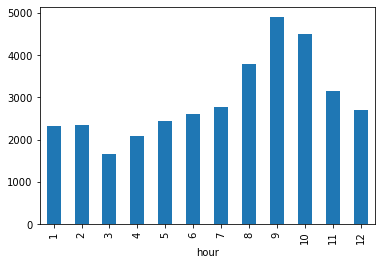

In [54]:
#3 sleep cycle 
df['hour'] = df['date'].apply(lambda x: x.hour)
df.groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

## 4. Word Cloud

In [ ]:
!pip install wordcloud

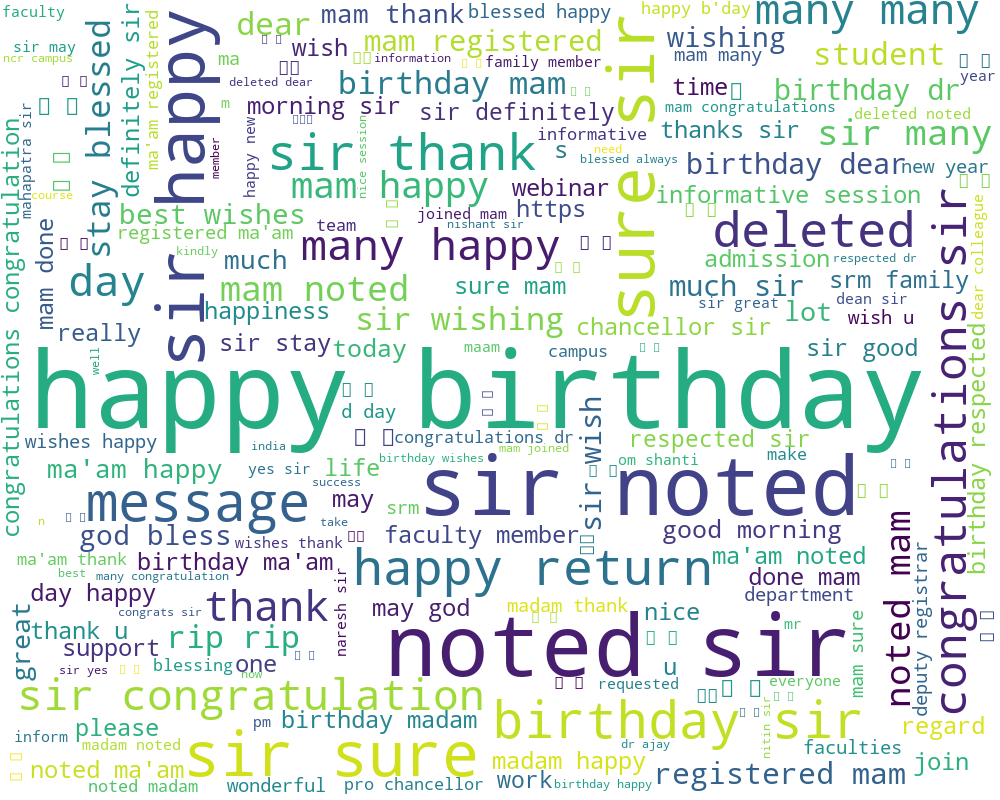

In [56]:
from wordcloud import WordCloud, STOPWORDS
all_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'will'])
for msg in df['message'].values:
  words = str(msg).lower().split()
  for word in words:
    all_words = all_words + word + ' '

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 


wordcloud.to_image()